In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

df = pd.read_csv('gdrive/My Drive/USvideos.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mn
from sklearn.impute import SimpleImputer

sns.set(style="whitegrid")
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)

def summary(df):
    pd.set_option('display.max_columns', 500)
    print(df.describe(include=[np.number]), '\n')
    print(df.describe(exclude=[np.number]))
    pd.set_option('display.max_columns', 5)

def head(df, full=True):
    if full:
        pd.set_option('display.max_columns', 500)
        print(df.head())
        pd.set_option('display.max_columns', 5)

    else:
        print(df.head())

def delete_cols(df, indexes):
    return df.drop(indexes, axis=1)

def aggregate(df, column, by):
    if type(by) is not list:
        tmp_df = df[[by, column]]
        pd.set_option('display.max_columns', 500)
        print(tmp_df.groupby([by]).describe())
        pd.set_option('display.max_columns', 5)
    else:
        tmp_df = df[by + [column]]
        pd.set_option('display.max_columns', 500)
        print(tmp_df.groupby(by).describe())
        pd.set_option('display.max_columns', 5)

def scatterplot(df, x, y, hue=None, size=None):
    _, ax = plt.subplots(figsize=(12, 8))
    sns.scatterplot(x, y, hue=hue, size=size, data=df, sizes=(20, 100), ax=ax)

def jointplot(df, x, y):
    sns.jointplot(x, y, kind='reg', data=df, height=8)

def histogram(df, x, bins=None):
    _, ax = plt.subplots(figsize=(12, 8))
    sns.distplot(df[x], ax=ax, bins=bins)

def boxplot(df, x=None, y=None, hue=None):
    _, ax = plt.subplots(figsize=(12, 8))
    if x is None:
        sns.boxplot(data=df, orient="h")
    elif type(x) is list:
        tmp_df = df[x]
        sns.boxplot(data=tmp_df, orient='h')
    else:
        sns.boxplot(x, y, hue=hue, data=df)

def n():
    print('\n')

def missing_vals(df):
    cols = df.isna().sum()/df.shape[0]
    cols = pd.DataFrame({'Column name': cols.index, 'Missing %': cols.values})
    rows = (df.isna().sum(axis=1)/df.shape[1]).value_counts()
    rows = pd.DataFrame({'Missing %': rows.index, 'Quantity': rows.values})
    print('Columns:')
    print(cols)
    n()
    print('Rows: ')
    print(rows)

def missing_vals_vis(df, figsize=(8, 4)):
    _, ax = plt.subplots(figsize=figsize)
    mn.matrix(df, ax=ax)
    _, ax2 = plt.subplots(figsize=figsize)
    mn.dendrogram(df, ax=ax2)
    _, ax3 = plt.subplots(figsize=figsize)
    mn.bar(df, ax=ax3)

def drop_mostly_missing(df, col_th=0.6, row_th=0.7):
    cols = df.isna().sum()/df.shape[0]
    cols = pd.DataFrame({'name': cols.index, 'missing': cols.values})
    df_tmp = cols.loc[cols['missing'] > col_th]
    df_tmp = df_tmp['name'].values
    ret_df = delete_cols(df, df_tmp)

    rows = ret_df.isna().sum(axis=1)/ret_df.shape[1]
    rows = pd.DataFrame({'index': rows.index, 'missing': rows.values})
    rows_tmp = rows.loc[rows['missing'] > row_th]
    rows_tmp = rows_tmp['index'].values
    ret_df = ret_df.drop(rows_tmp)

    return ret_df

def fill_missing(df, cols='all', strategy='median'):
    if cols == 'all':
        imputer = SimpleImputer(missing_values=np.nan, strategy=strategy)
        imputed_df = pd.DataFrame(imputer.fit_transform(df))
        imputed_df.columns = df.columns
        imputed_df.index = df.index
        return imputed_df
    else:
        imputer = SimpleImputer(missing_values=np.nan, strategy=strategy)
        imputed_df = pd.DataFrame(imputer.fit_transform(df[cols]))
        df[cols] = imputed_df.values
        return df

In [0]:
df = delete_cols(df, ['video_id', 'trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'thumbnail_link', 'video_error_or_removed', 'description'])
summary(df)

       category_id           views         likes      dislikes  comment_count
count  40949.00000     40949.00000   40949.00000   40949.00000    40949.00000
mean      19.97243   2360784.63826   74266.70243    3711.40089     8446.80368
std        7.56833   7394113.75970  228885.33821   29029.70595    37430.48699
min        1.00000       549.00000       0.00000       0.00000        0.00000
25%       17.00000    242329.00000    5424.00000     202.00000      614.00000
50%       24.00000    681861.00000   18091.00000     631.00000     1856.00000
75%       25.00000   1823157.00000   55417.00000    1938.00000     5755.00000
max       43.00000 225211923.00000 5613827.00000 1674420.00000  1361580.00000 

       comments_disabled ratings_disabled
count              40949            40949
unique                 2                2
top                False            False
freq               40316            40780


In [0]:
head(df)

   category_id    views   likes  dislikes  comment_count  comments_disabled  \
0           22   748374   57527      2966          15954              False   
1           24  2418783   97185      6146          12703              False   
2           23  3191434  146033      5339           8181              False   
3           24   343168   10172       666           2146              False   
4           24  2095731  132235      1989          17518              False   

   ratings_disabled  
0             False  
1             False  
2             False  
3             False  
4             False  


In [0]:
aggregate(df, 'likes', 'comments_disabled')

                        likes                                              \
                        count        mean          std     min        25%   
comments_disabled                                                           
False             40316.00000 75096.05063 230536.44314 0.00000 5589.00000   
True                633.00000 21445.21485  35287.31103 0.00000   99.00000   

                                                         
                          50%         75%           max  
comments_disabled                                        
False             18286.00000 55948.75000 5613827.00000  
True               3704.00000 28538.00000  233312.00000  


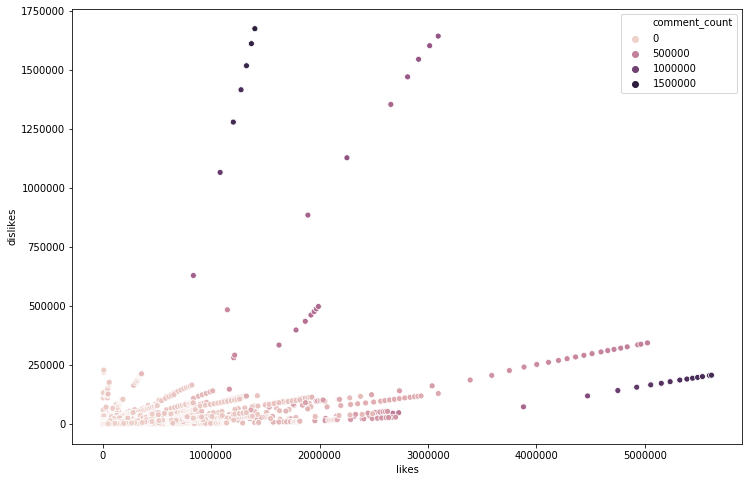

In [0]:
scatterplot(df, 'likes', 'dislikes', hue='comment_count')

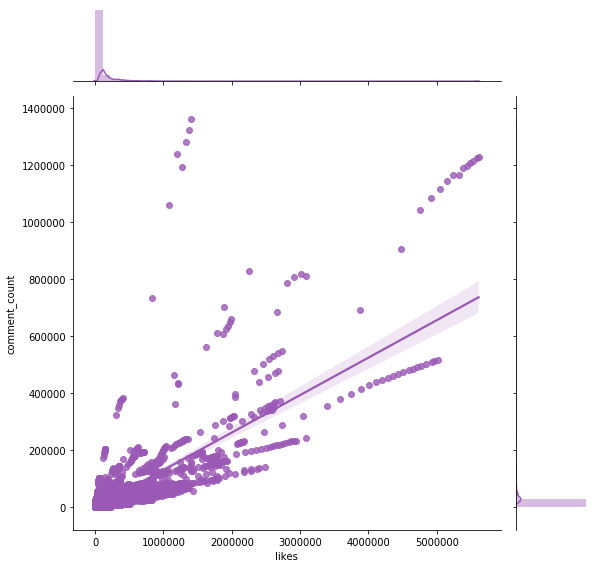

In [0]:
jointplot(df, 'likes', 'comment_count')

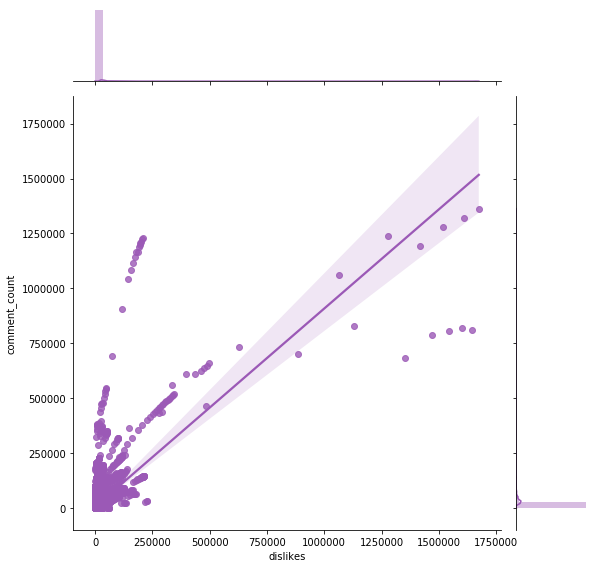

In [0]:
jointplot(df, 'dislikes', 'comment_count')

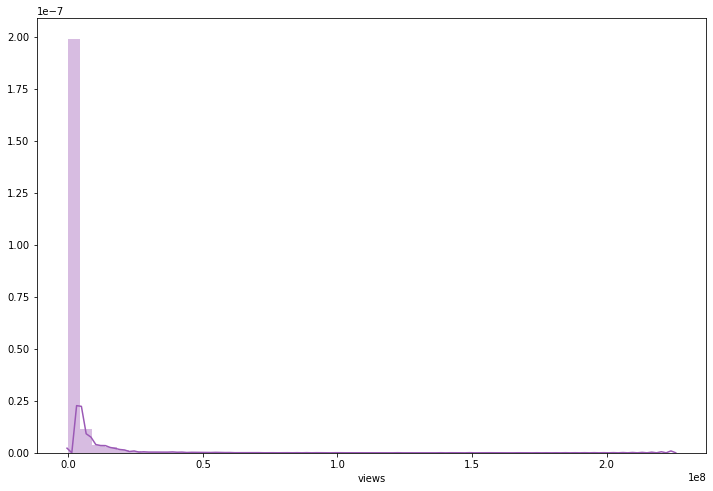

In [0]:
histogram(df, 'views')

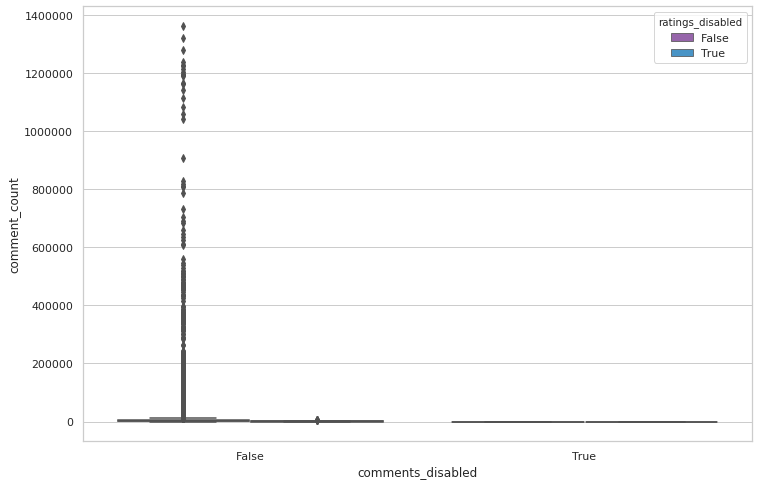

In [0]:
boxplot(df, x='comments_disabled', y='comment_count', hue='ratings_disabled')

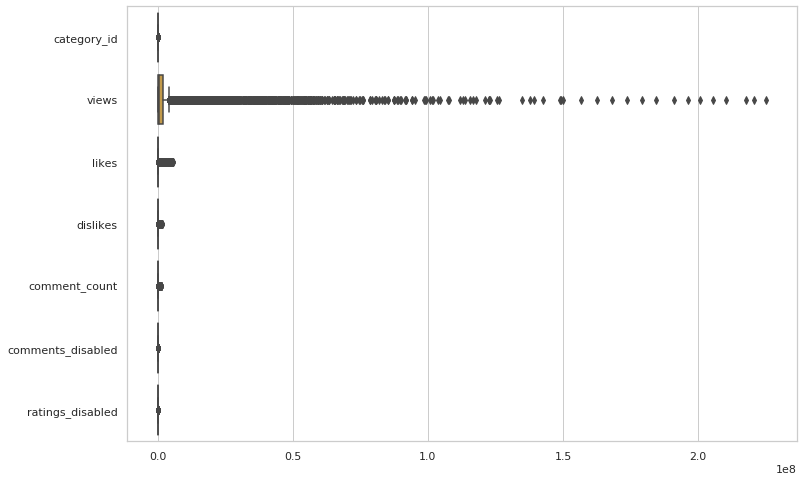

In [0]:
boxplot(df)

In [0]:
aggregate(df, 'views', ['comments_disabled', 'ratings_disabled'])

                                         views                               \
                                         count          mean            std   
comments_disabled ratings_disabled                                            
False             False            40253.00000 2360486.46312  7414615.58940   
                  True                63.00000  964191.26984  3291514.31877   
True              False              527.00000 1817993.14231  2447641.35169   
                  True               106.00000 6002661.47170 13912855.94844   

                                                                         \
                                          min          25%          50%   
comments_disabled ratings_disabled                                        
False             False             549.00000 244302.00000 683364.00000   
                  True             2068.00000  71540.50000 252254.00000   
True              False             748.00000 136706.50000 603783.00000

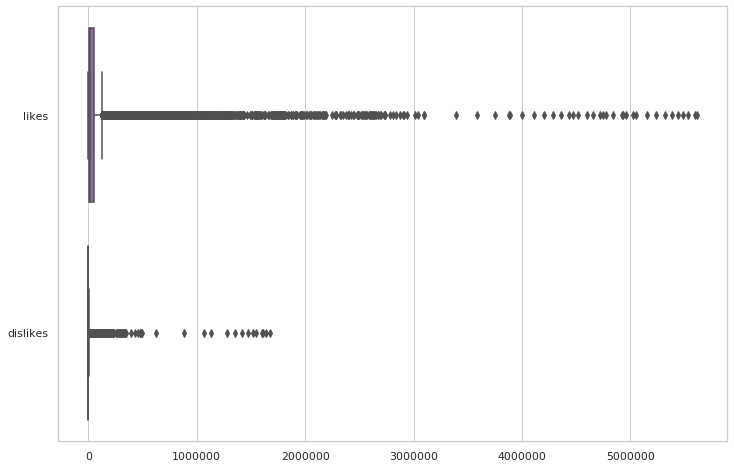

In [0]:
boxplot(df, x=['likes', 'dislikes'])

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/suchy1713/EmotionPredicition/master/data/preprocessed/merged.csv')

#drop emospace answers
df = df.drop(df[df['WIDGET-TYPE'] == 'emospace1'].index)

#drop useless features
df = df.drop(['TIMESTAMP', 'WIDGET-TYPE', 'COND', 'ANS-TIME', 'IADS-ID', 'IAPS-ID', 'ID', 'PROCEDURE-BEGIN-TIMESTAMP', 'PROCEDURE-END-TIMESTAMP', 'BIOSIGS-BEGIN-TIMESTAMP', 'BIOSIGS-END-TIMESTAMP', 'NEO-FFI', 'BIOSIGS', 'PROCEDURE', 'SPACE', 'FREUD', 'PHOTOS'], axis=1)

df = df.assign(NEUROTICISM=np.nan)
df = df.assign(OOO=np.nan)

In [266]:
missing_vals(df)

Columns:
         Column name  Missing %
0       COND-DETAILS    0.00000
1                ANS    0.00000
2                AGE    0.01613
3                SEX    0.00000
4           OPENNESS    0.17742
5  CONSCIENTIOUSNESS    0.17742
6       EXTRAVERSION    0.17742
7      AGREEABLENESS    0.17742
8        NEUROTICISM    1.00000
9                OOO    1.00000


Rows: 
   Missing %  Quantity
0    0.20000      9180
1    0.60000      1800
2    0.70000       180


In [267]:
df = drop_mostly_missing(df)

missing_vals(df)

Columns:
         Column name  Missing %
0       COND-DETAILS    0.00000
1                ANS    0.00000
2                AGE    0.01613
3                SEX    0.00000
4           OPENNESS    0.17742
5  CONSCIENTIOUSNESS    0.17742
6       EXTRAVERSION    0.17742
7      AGREEABLENESS    0.17742


Rows: 
   Missing %  Quantity
0    0.00000      9180
1    0.50000      1800
2    0.62500       180


In [269]:
df = fill_missing(df, cols=['OPENNESS', 'AGE', 'CONSCIENTIOUSNESS', 'EXTRAVERSION', 'AGREEABLENESS'])
missing_vals(df)

Columns:
         Column name  Missing %
0       COND-DETAILS    0.00000
1                ANS    0.00000
2                AGE    0.00000
3                SEX    0.00000
4           OPENNESS    0.00000
5  CONSCIENTIOUSNESS    0.00000
6       EXTRAVERSION    0.00000
7      AGREEABLENESS    0.00000


Rows: 
   Missing %  Quantity
0    0.00000     11160
